In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
import pandas as pd
import cvxpy as cp
import gym
import matplotlib.pyplot as plt
from numpy.linalg import LinAlgError
import gurobipy
import seaborn as sns

import sys
sys.path.append('./asebo/')
sys.path.append('./rl/')
from optimizers import Adam
from worker import worker, get_policy
from es import ES

from methods import Gradient_LP, Hessian_LP, Hessian_LP_structured, \
                    get_PTinverse, run_HessianES, aggregate_rollouts_hessianES,\
                    run_asebo, gradient_LP_antithetic_estimator, invHessian_LP_structured_PTinv_estimator,\
                    invHessian_identity_estimator, run_HessianES,\
                    gradient_L2_antithetic_estimator, gradient_antithetic_estimator, invHessian_L2_structured_PTinv_estimator

## Training

In [23]:
########### Setting up params ##########
params = {
# 'env_name': 'Swimmer-v2',
'env_name': 'HalfCheetah-v2',
# 'env_name': 'InvertedPendulum-v2',
# 'env_name': 'InvertedDoublePendulum-v2',
# 'env_name': 'Reacher-v2',
# 'env_name': 'Hopper-v2',
'steps':1000,
'h_dim':16,
'start':0,
'max_iter':100,
'seed':0,
'k':140, # ASEBO only?
'num_sensings':25,
'log':False,
'linear':True,
'threshold':0.995,
'decay':0.99,
'learning_rate':0.05,#0.05
'filename':'v2',
'policy':'Toeplitz', # Linear or Toeplitz
'shift':0,
'min':10,
'sigma':1e-1,
'backtracking':False,
'alpha': 1e-6,
'beta': 0.25,
'sample_from_invH': False
}



gradient_estimator = gradient_LP_antithetic_estimator
# gradient_estimator = gradient_antithetic_estimator
# gradient_estimator = gradient_L2_antithetic_estimator

invhessian_estimator = invHessian_LP_structured_PTinv_estimator

# invhessian_estimator =  invHessian_identity_estimator
# params['filename'] = "identity"

In [24]:
########### Auto Param Setups ##########

env = gym.make(params['env_name'])
params['ob_dim'] = env.observation_space.shape[0]
params['ac_dim'] = env.action_space.shape[0]
params['k'] += -1
# params['alpha'] = 1 # ASEBO only
params['zeros'] = False
master = get_policy(params)
if params['log']:
    params['num_sensings'] = 4 + int(3 * np.log(master.N))
if params['linear']:
    params['num_sensings'] = int(2 * master.N)

## Train

In [9]:
master = get_policy(params)

params['learning_rate'] = 1
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)

# params['learning_rate'] = 0.05
# ts, rewards, master = run_asebo(params, master)

Policy Dimension:  116
Academic license - for non-commercial use only - expires 2022-02-06
Using license file /Users/stevenyin/gurobi.lic
Iteration: 1, Leanring Rate: 1.000e+00, Rollouts: 464, Reward: 394.80, Update Direction Norm: 11.38
Iteration: 2, Leanring Rate: 2.328e-10, Rollouts: 928, Reward: 394.80, Update Direction Norm: 13.14
Iteration: 3, Leanring Rate: 2.500e-01, Rollouts: 1392, Reward: 448.45, Update Direction Norm: 12.12
Iteration: 4, Leanring Rate: 5.960e-08, Rollouts: 1856, Reward: 450.34, Update Direction Norm: 11.13
Iteration: 5, Leanring Rate: 1.562e-02, Rollouts: 2320, Reward: 508.46, Update Direction Norm: 11.95
Iteration: 6, Leanring Rate: 5.821e-11, Rollouts: 2784, Reward: 508.46, Update Direction Norm: 17.76
Iteration: 7, Leanring Rate: 5.821e-11, Rollouts: 3248, Reward: 508.46, Update Direction Norm: 22.82
Iteration: 8, Leanring Rate: 5.821e-11, Rollouts: 3712, Reward: 508.46, Update Direction Norm: 18.51
Iteration: 9, Leanring Rate: 5.821e-11, Rollouts: 4176, 

Iteration: 80, Leanring Rate: 5.821e-11, Rollouts: 37120, Reward: 635.09, Update Direction Norm: 29.86
Iteration: 81, Leanring Rate: 5.821e-11, Rollouts: 37584, Reward: 635.09, Update Direction Norm: 30.92
Iteration: 82, Leanring Rate: 5.821e-11, Rollouts: 38048, Reward: 635.09, Update Direction Norm: 30.16
Iteration: 83, Leanring Rate: 5.821e-11, Rollouts: 38512, Reward: 635.09, Update Direction Norm: 32.02
Iteration: 84, Leanring Rate: 5.821e-11, Rollouts: 38976, Reward: 635.09, Update Direction Norm: 30.13
Iteration: 85, Leanring Rate: 5.821e-11, Rollouts: 39440, Reward: 635.09, Update Direction Norm: 29.73
Iteration: 86, Leanring Rate: 5.821e-11, Rollouts: 39904, Reward: 635.09, Update Direction Norm: 31.40
Iteration: 87, Leanring Rate: 5.821e-11, Rollouts: 40368, Reward: 635.09, Update Direction Norm: 32.10
Iteration: 88, Leanring Rate: 5.821e-11, Rollouts: 40832, Reward: 635.09, Update Direction Norm: 31.35
Iteration: 89, Leanring Rate: 5.821e-11, Rollouts: 41296, Reward: 635.09,

Iteration: 13, Rollouts: 6032, Reward: 402.9112595760442, Alpha: 1, Samples: 232
Iteration: 14, Rollouts: 6496, Reward: 523.359529135303, Alpha: 1, Samples: 232
Iteration: 15, Rollouts: 6960, Reward: 233.20515983886892, Alpha: 1, Samples: 232
Iteration: 16, Rollouts: 7424, Reward: 461.734010934614, Alpha: 1, Samples: 232
Iteration: 17, Rollouts: 7888, Reward: 336.32782185953033, Alpha: 1, Samples: 232
Iteration: 18, Rollouts: 8352, Reward: 435.6066750112622, Alpha: 1, Samples: 232
Iteration: 19, Rollouts: 8816, Reward: 330.8027982644783, Alpha: 1, Samples: 232
Iteration: 20, Rollouts: 9280, Reward: 170.89479547269843, Alpha: 1, Samples: 232
Iteration: 21, Rollouts: 9744, Reward: 285.1929477657582, Alpha: 1, Samples: 232
Iteration: 22, Rollouts: 10208, Reward: 446.28365031964745, Alpha: 1, Samples: 232
Iteration: 23, Rollouts: 10672, Reward: 31.408362916034715, Alpha: 1, Samples: 232
Iteration: 24, Rollouts: 11136, Reward: 338.16888880609116, Alpha: 1, Samples: 232
Iteration: 25, Rollou

Iteration: 113, Rollouts: 52432, Reward: 276.0447823787023, Alpha: 1, Samples: 232
Iteration: 114, Rollouts: 52896, Reward: 258.19111995667174, Alpha: 1, Samples: 232
Iteration: 115, Rollouts: 53360, Reward: 336.9920393492836, Alpha: 1, Samples: 232


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 116, Rollouts: 53824, Reward: 320.77020478972725, Alpha: 0.4025033629624227, Samples: 232


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 117, Rollouts: 54006, Reward: 441.4155132113398, Alpha: 0.46930685394309873, Samples: 91


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 118, Rollouts: 54188, Reward: 225.3484912013509, Alpha: 0.27218275122793667, Samples: 91


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 119, Rollouts: 54372, Reward: 446.9663109978462, Alpha: 0.2887529512551315, Samples: 92


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 120, Rollouts: 54556, Reward: 314.71444475803287, Alpha: 0.3037102109246066, Samples: 92


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 121, Rollouts: 54740, Reward: 244.78664139255372, Alpha: 0.32893352137893683, Samples: 92


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 122, Rollouts: 54924, Reward: 283.2098760111292, Alpha: 0.3808114620201357, Samples: 92


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 123, Rollouts: 55110, Reward: 401.7429341054041, Alpha: 0.29560832410114507, Samples: 93


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 124, Rollouts: 55296, Reward: 298.3904808860239, Alpha: 0.32448128773485824, Samples: 93


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 125, Rollouts: 55482, Reward: 389.94815567386496, Alpha: 0.24772855919978998, Samples: 93


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 126, Rollouts: 55668, Reward: 223.9702349243305, Alpha: 0.2682645403833371, Samples: 93


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 127, Rollouts: 55854, Reward: 342.5340179756667, Alpha: 0.2892672149548284, Samples: 93


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 128, Rollouts: 56042, Reward: 342.5340179756667, Alpha: 0.31364341490422615, Samples: 94


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 129, Rollouts: 56230, Reward: 477.89421185523645, Alpha: 0.20208294480065941, Samples: 94


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 130, Rollouts: 56418, Reward: 477.67288795147687, Alpha: 0.3012458153503889, Samples: 94


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 131, Rollouts: 56606, Reward: 477.67288786095287, Alpha: 0.27703158935520616, Samples: 94


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 132, Rollouts: 56794, Reward: 477.89220451314316, Alpha: 0.35099109854620725, Samples: 94


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 133, Rollouts: 56982, Reward: 477.8920478194196, Alpha: 0.2838156268833165, Samples: 94


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 134, Rollouts: 57170, Reward: 374.04352478923795, Alpha: 0.30757719278697154, Samples: 94


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 135, Rollouts: 57360, Reward: 374.04352478923795, Alpha: 0.2012315373255927, Samples: 95


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 136, Rollouts: 57550, Reward: 474.53069664930416, Alpha: 0.2695472320185639, Samples: 95


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 137, Rollouts: 57740, Reward: 474.53069664930416, Alpha: 0.2262255744813803, Samples: 95


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 138, Rollouts: 57930, Reward: 346.45188043144435, Alpha: 0.2888676383044675, Samples: 95


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 139, Rollouts: 58120, Reward: 506.32348126656734, Alpha: 0.24489879979143545, Samples: 95


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 140, Rollouts: 58310, Reward: 567.0434737540421, Alpha: 0.2705810860154624, Samples: 95


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 141, Rollouts: 58500, Reward: 567.0434737540421, Alpha: 0.2717398832229893, Samples: 95


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 142, Rollouts: 58692, Reward: 567.0434737540421, Alpha: 0.2639869117265265, Samples: 96


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 143, Rollouts: 58884, Reward: 360.60029679823236, Alpha: 0.25844506111038024, Samples: 96


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 144, Rollouts: 59076, Reward: 360.60029679823236, Alpha: 0.15343295025253492, Samples: 96


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 145, Rollouts: 59268, Reward: 477.6728887642748, Alpha: 0.2789135073794497, Samples: 96


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 146, Rollouts: 59460, Reward: 477.6728887642748, Alpha: 0.23657478839615625, Samples: 96


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 147, Rollouts: 59652, Reward: 477.6728887642748, Alpha: 0.30102052822267844, Samples: 96


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 148, Rollouts: 59844, Reward: 477.6728887642748, Alpha: 0.4177598430445425, Samples: 96


/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:36: RuntimeWarning: invalid value encountered in matmul
  UUT = np.matmul(U.T, U)
/Users/stevenyin/Google Drive/columbia/semester 9/krzysztof class/Project6617/asebo/es.py:38: RuntimeWarning: invalid value encountered in matmul
  UUT_ort = np.matmul(U_ort.T, U_ort)


Iteration: 149, Rollouts: 60038, Reward: 477.6728887642748, Alpha: 0.3476214522058415, Samples: 97


In [ ]:
params['seed'] = 1
master = get_policy(params)

# params['learning_rate'] = 1
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)

# params['learning_rate'] = 0.05
# ts, rewards, master = run_asebo(params, master)

Policy Dimension:  116
Iteration: 1, Leanring Rate: 5.000e-02, Rollouts: 464, Reward: -2.46, Update Direction Norm: 14.75
Iteration: 2, Leanring Rate: 5.000e-02, Rollouts: 928, Reward: -1.86, Update Direction Norm: 1.96
Iteration: 3, Leanring Rate: 5.000e-02, Rollouts: 1392, Reward: -1.52, Update Direction Norm: 1.31
Iteration: 4, Leanring Rate: 5.000e-02, Rollouts: 1856, Reward: -1.28, Update Direction Norm: 0.98
Iteration: 5, Leanring Rate: 5.000e-02, Rollouts: 2320, Reward: -1.01, Update Direction Norm: 1.18
Iteration: 6, Leanring Rate: 5.000e-02, Rollouts: 2784, Reward: -0.98, Update Direction Norm: 1.23
Iteration: 7, Leanring Rate: 5.000e-02, Rollouts: 3248, Reward: -1.03, Update Direction Norm: 1.20
Iteration: 8, Leanring Rate: 5.000e-02, Rollouts: 3712, Reward: -1.17, Update Direction Norm: 1.18
Iteration: 9, Leanring Rate: 5.000e-02, Rollouts: 4176, Reward: -1.18, Update Direction Norm: 0.96
Iteration: 10, Leanring Rate: 5.000e-02, Rollouts: 4640, Reward: -1.25, Update Directio

In [ ]:
params['max_iter'] = 200
params['seed'] = 2


# params['learning_rate'] = 1
master = get_policy(params)
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)


# params['learning_rate'] = 0.05
master = get_policy(params)
ts, rewards, master = run_asebo(params, master)

In [ ]:
params['seed'] = 3

params['learning_rate'] = 1
master = get_policy(params)
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)

params['learning_rate'] = 0.05
master = get_policy(params)
ts, rewards, master = run_asebo(params, master)

## Save and Plot

In [ ]:
# np.save("./data/{}/asebo_params.npy".format(params['dir']), master.params)
# np.save("./data/{}/asebo_ts.npy".format(params['dir']), ts)
# np.save("./data/{}/asebo_rs.npy".format(params['dir']), rewards)


In [21]:
title = "Swimmer-v2"
asebo_df = pd.read_csv("./data/Swimmer-v2Linear_h16_lr0.05_num_sensings125_/Seed0.csv")
hessian_df = pd.read_csv("./data/Swimmer-v2Linear_h16_lr1_num_sensings125__hessianES/Seed0.csv")
# hessian_dfv2 = pd.read_csv("./data/Swimmer-v2Linear_h16_lr1_num_sensings32_v2_hessianES/Seed0.csv")
hessian_dfv2 = pd.read_csv("./data/Swimmer-v2Linear_h16_lr1_num_sensings32_sampleFromInvHFalse_hessianES/Seed2.csv")
hessian_dfv3 = pd.read_csv("./data/Swimmer-v2Linear_h16_lr1_num_sensings32_sampleFromInvHFalse_hessianES/Seed1.csv")



# title = "InvertedPendulum-v2"
# asebo_df = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings25__asebo/Seed0.csv")
# hessian_df = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings25__hessianES/Seed0.csv")
# hessian_dfv2 = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings8_v2_hessianES/Seed0.csv")
# hessian_dfv3 = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings8_sampleFromInvHFalse_hessianES/Seed0.csv")


title = "Hopper-v2"
# asebo_df = pd.read_csv("./data/Hopper-v2Linear_h16_lr0.05_num_sensings66__asebo/Seed0.csv")
asebo_df = pd.read_csv("./data/Hopper-v2Linear_h16_lr0.05_num_sensings66_sampleFromInvHFalse_asebo/Seed3.csv")
hessian_df = pd.read_csv("./data/Hopper-v2Linear_h16_lr1_num_sensings66__hessianES/Seed0.csv")
hessian_dfv2 = pd.read_csv("./data/Hopper-v2Linear_h16_lr1_num_sensings66_sampleFromInvHFalse_hessianES/Seed3.csv")
hessian_dfv3 = pd.read_csv("./data/Hopper-v2Linear_h16_lr1_num_sensings66_sampleFromInvHFalse_hessianES/Seed2.csv")


# title = "Reacher-v2"
# asebo_df = pd.read_csv("./data/Reacher-v2Linear_h16_lr0.05_num_sensings44__asebo/Seed0.csv")
# hessian_df = pd.read_csv("./data/Reacher-v2Linear_h16_lr1_num_sensings44__hessianES/Seed0.csv")
# hessian_dfv2 = pd.read_csv("./data/Reacher-v2Linear_h16_lr1_num_sensings44_sampleFromInvHFalse_hessianES/Seed2.csv")
# hessian_dfv3 = None


title = "HalfCheetah-v2"
# asebo_df = pd.read_csv("./data/HalfCheetah-v2Linear_h16_lr0.05_num_sensings204__asebo/Seed0.csv")
asebo_df2 = pd.read_csv("./data/HalfCheetah-v2Toeplitz_h16_lr0.05_num_sensings232_sampleFromInvHFalse_asebo/Seed1.csv")
# hessian_df = pd.read_csv("./data/HalfCheetah-v2Linear_h16_lr1_num_sensings204__hessianES/Seed0.csv")
# hessian_dfv2 = pd.read_csv("./data/HalfCheetah-v2Linear_h16_lr1_num_sensings204_v2_hessianES/Seed0.csv")
hessian_dfv3 = pd.read_csv("./data/HalfCheetah-v2Toeplitz_h16_lr1_num_sensings232_sampleFromInvHFalse_hessianES/Seed1.csv")




# title = "InvertedDoublePendulum-v2"
# asebo_df = pd.read_csv("./data/InvertedDoublePendulum-v2Linear_h16_lr0.05_num_sensings22__asebo/Seed0.csv")
# hessian_df = pd.read_csv("./data/InvertedDoublePendulum-v2Linear_h16_lr1_num_sensings22__hessianES/Seed0.csv")


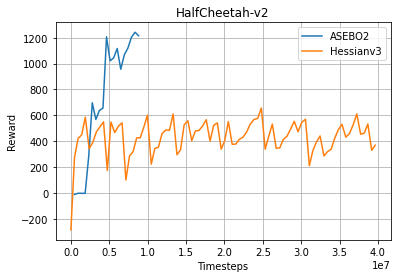

In [22]:
# plt.plot(asebo_ts, asebo_rewards, label="ASEBO")
# plt.plot(lpgrad_ts, lpgrad_rewards, label="LP gradient")

# sns.lineplot(data=asebo_df, x="Timesteps", y="Reward", label="ASEBO")
sns.lineplot(data=asebo_df2, x="Timesteps", y="Reward", label="ASEBO2")
# sns.lineplot(data=hessian_df, x="Timesteps", y="Reward", label="Hessian")
# sns.lineplot(data=hessian_dfv2, x="Timesteps", y="Reward", label="Hessianv2")
sns.lineplot(data=hessian_dfv3, x="Timesteps", y="Reward", label="Hessianv3")

plt.grid()
plt.title(title)
# plt.xlim(0, 1e7)
plt.savefig("./plots/%s.png" % title)


# Testing

In [8]:
master = get_policy(params)
master.params=np.load("./data/Hopper-v2Linear_h16_lr0.05_num_sensings66_sampleFromInvHFalse_asebo/asebo_params.npy")
test_policy = worker(params, master, np.zeros([1, master.N]), 0)


In [9]:
from gym.wrappers import Monitor
env = Monitor(gym.make(params['env_name']), './video', force=True)
env._max_episode_steps = params['steps']

In [10]:
def play(env, worker):
    state = env.reset()
    while 1:
        action = worker.policy.evaluate(state)
        action = np.clip(action, worker.env.action_space.low[0], worker.env.action_space.high[0])
        action = action.reshape(len(action), )
        state, reward, done, info = env.step(action)
        env.render()
        if done: 
            break

In [11]:
play(env, test_policy)

Creating offscreen glfw
Creating window glfw
